In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [70]:
plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title

# Variables
Country- Country    
Year- Year    
Status- Developed or Developing status    
Life Expectancy- Age(years)   
Adult Mortality- Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population)         
Infant Deaths- Number of Infant Deaths per 1000 population        
Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)  
Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)   
Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%)   
Measles- number of reported measles cases per 1000 population    
BMI- Average Body Mass Index of entire population    
U-5 Deaths- Number of under-five deaths per 1000 population    
Polio- Polio(Pol3) immunization coverage among 1-year-olds(%)    
Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%)    
Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%)      
HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years)    
GDP- Gross Domestic Product per capita(in USD)   
Population- Population 
Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19(%)    
Thinness 5-9- Prevalence of thinness among children for Age 5 to 9(%)    
Income Composition- Human Development Index in terms of income composition of resources(0-1)  
Schooling- Number of years of Schooling  

Dataset found at:https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [3]:
df=pd.read_csv(r'C:\Users\yugsi\Downloads\led.csv')
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [5]:
df.shape

(2938, 22)

# 
# **Data Cleaning**


AxesSubplot(0.125,0.125;0.698618x0.755)


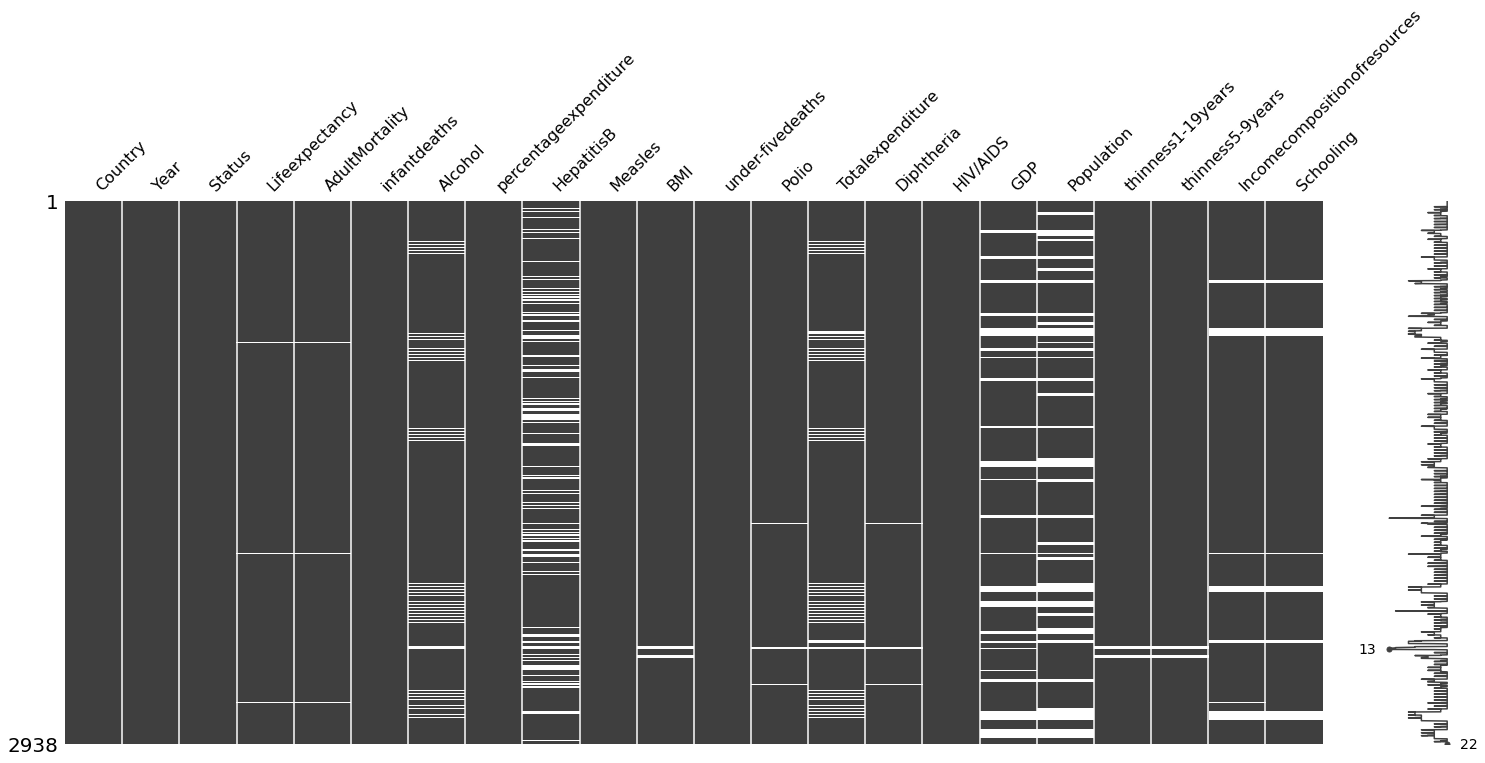

In [6]:
print(msno.matrix(df))

In [7]:
df=df.drop(['Population','GDP'],axis=1)

In [8]:


l=[]
for i in df.columns:
    if(df[i].isna().sum()>0):
        
        for j in range (len((df[i]))):
                country=df['Country'][j]
                if(df[i].isnull()[j]==True):
                    
                     df[i][j]=df[df['Country']==country][i].mean() 
                    
df1=df[(df['Status']=='Developed')].fillna(df[(df['Status']=='Developed')].mean())
df2=df[(df['Status']=='Developing')].fillna(df[(df['Status']=='Developing')].mean())                    
df=df2.append(df1)            
        

C:\Users\yugsi\AppData\Local\Temp/ipykernel_3096/4028283028.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j]=df[df['Country']==country][i].mean()
C:\Users\yugsi\AppData\Local\Temp/ipykernel_3096/4028283028.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=df[(df['Status']=='Developed')].fillna(df[(df['Status']=='Developed')].mean())
C:\Users\yugsi\AppData\Local\Temp/ipykernel_3096/4028283028.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2=df

AxesSubplot(0.125,0.125;0.698618x0.755)


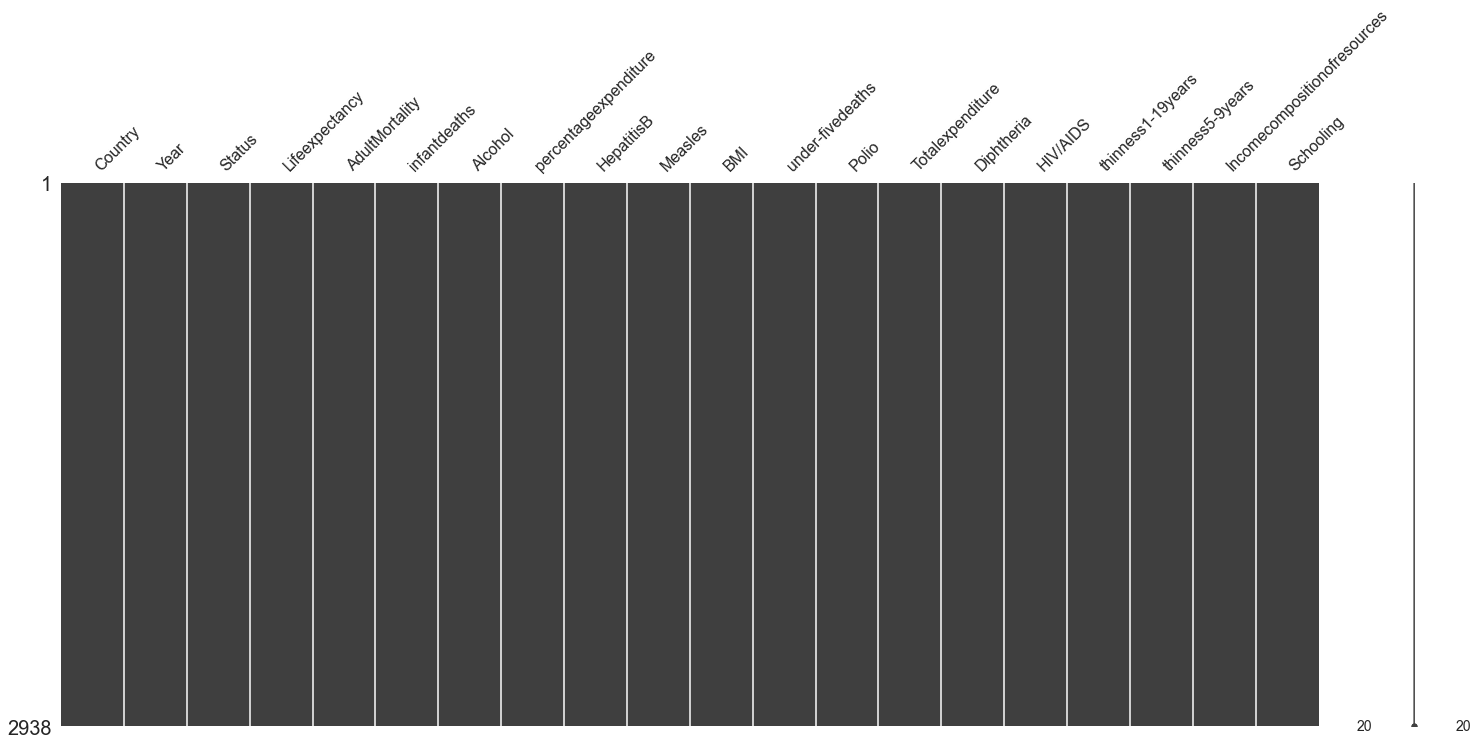

In [62]:
import missingno as msno
print(msno.matrix(df))

Population and GDP will be dropped due to discrepancies with the data. They would useful to have, but it is more likely to hinder the data due to poor reporting from there. The combination of the features will be a good litmus to meaure life expectancy.

In [11]:
f=df.drop(['Country','Year','Status'],axis=1).columns


# 

# EDA




In [10]:
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


In [12]:
l1=[]
for i in f:
    c=0
    l=np.percentile(df[i],25,interpolation = 'midpoint')
    u=np.percentile(df[i],75,interpolation = 'midpoint')
    iqr=u-l
    for j in df[i]:
        if((j<l-(1.5*iqr)) | (j>(u+1.5*iqr))):
            c=c+1
    l1.append(c)
s=pd.Series(l1,index=[f])
s

Lifeexpectancy                   17
AdultMortality                   86
infantdeaths                    315
Alcohol                           1
percentageexpenditure           389
HepatitisB                      262
Measles                         543
BMI                               0
under-fivedeaths                394
Polio                           290
Totalexpenditure                 36
Diphtheria                      309
HIV/AIDS                        542
thinness1-19years               100
thinness5-9years                 99
Incomecompositionofresources    130
Schooling                        61
dtype: int64

In [13]:
df['Country'].nunique()

193

In [14]:
status_counts=df.groupby('Status').Country.nunique()
status_counts

Status
Developed      32
Developing    161
Name: Country, dtype: int64

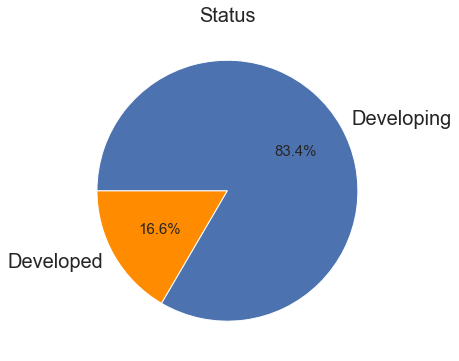

In [71]:
plt.figure(figsize=(12,6))
plt.title('Status',size=20)
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=180,colors=['darkorange','b']);

### Comparing each feature in Developed/Developing countries

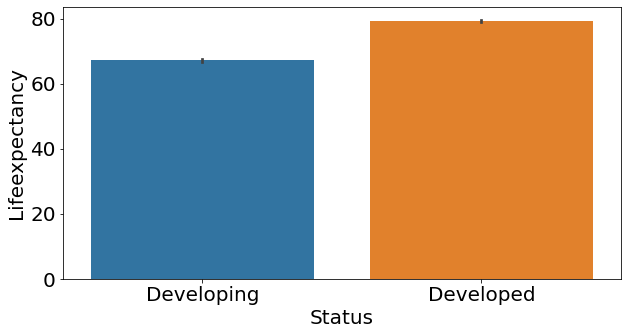

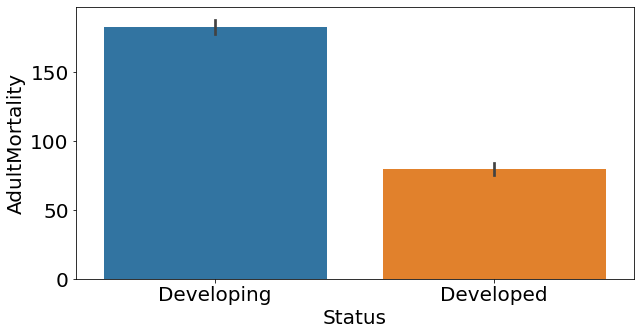

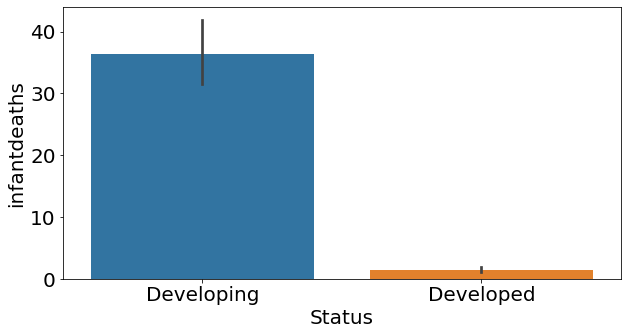

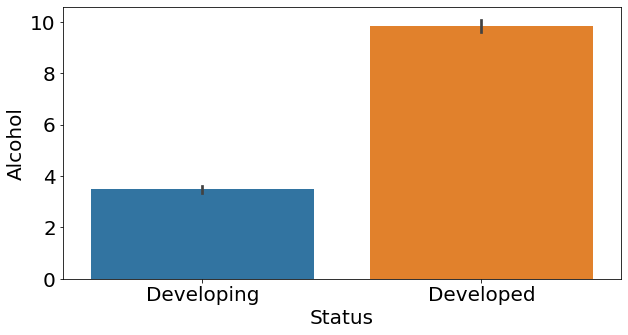

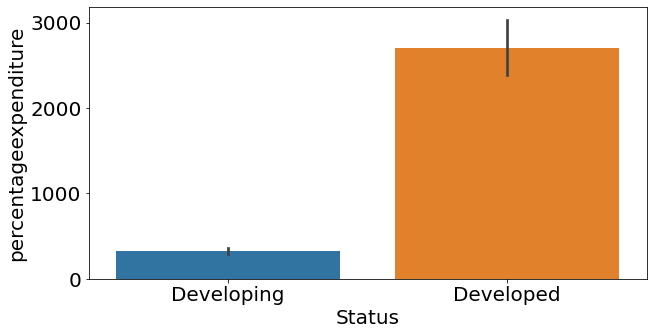

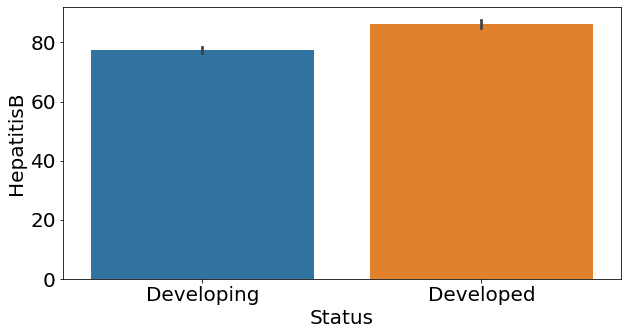

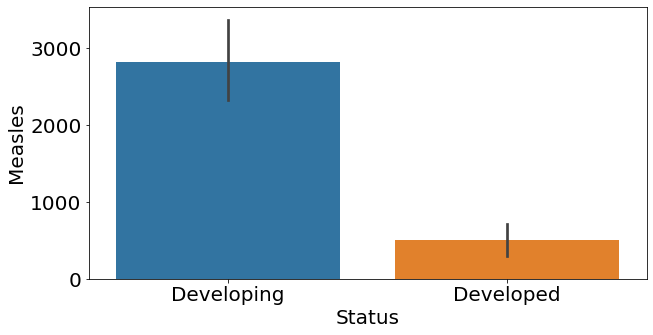

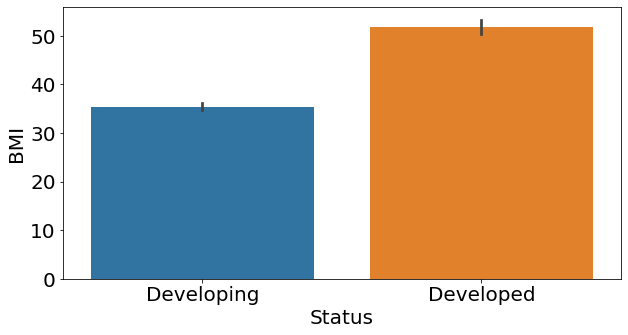

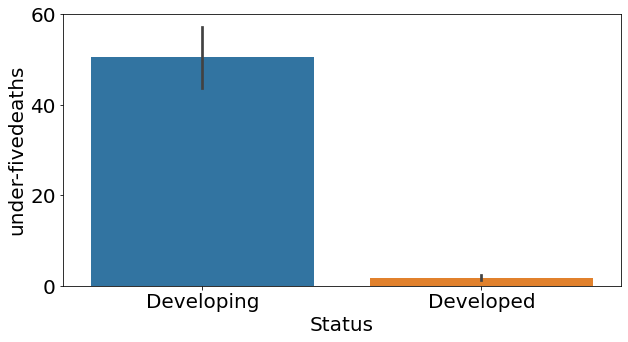

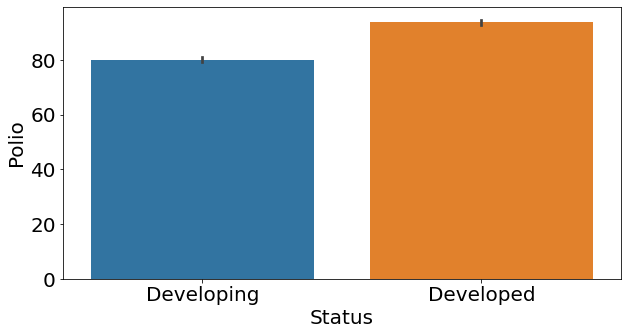

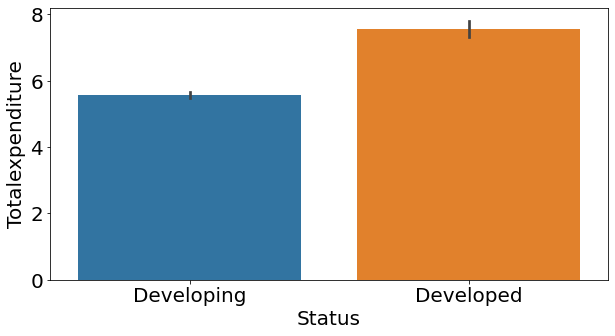

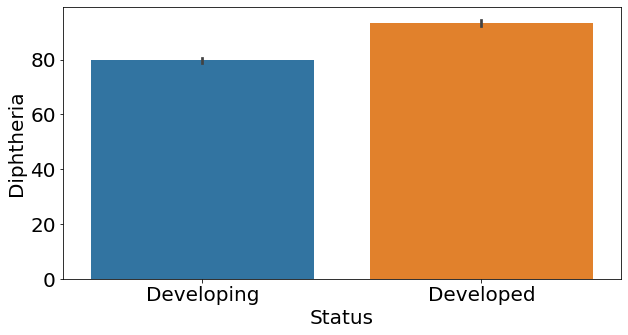

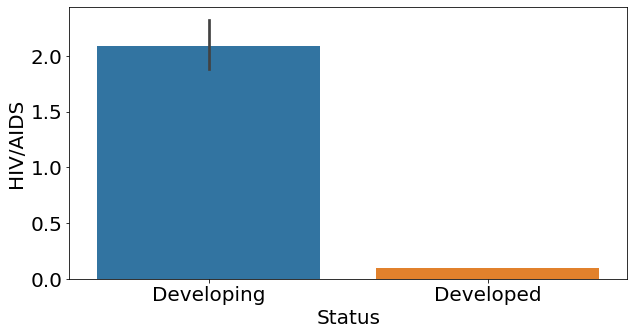

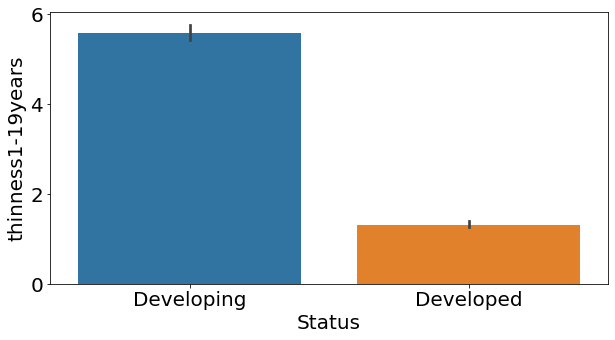

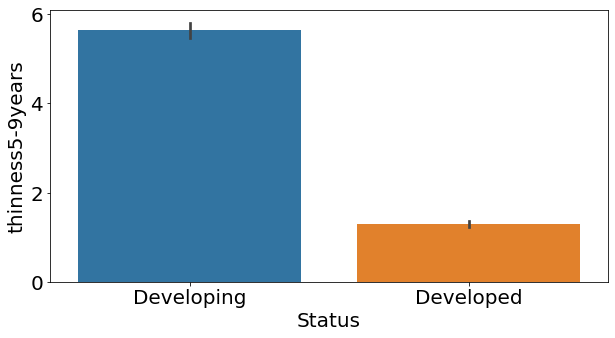

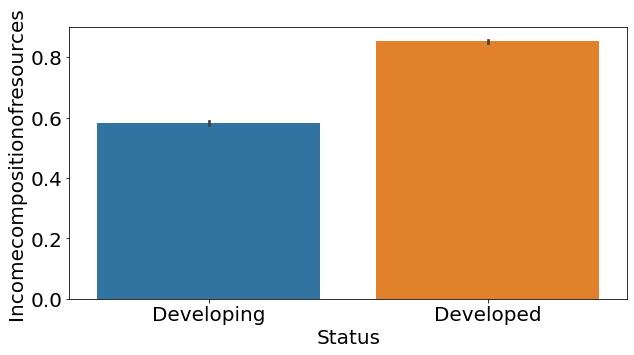

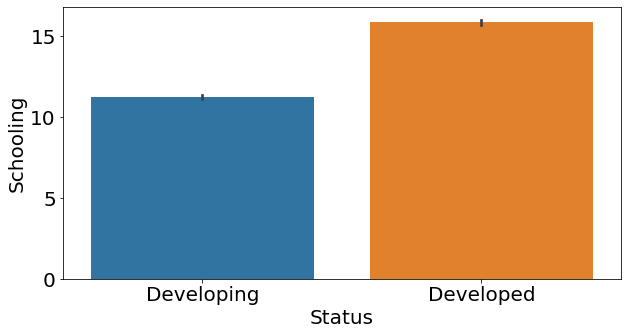

In [16]:

for i in f:
    fig = plt.figure(figsize=(10,5))
    sns.barplot(x='Status',y=i,data=df)

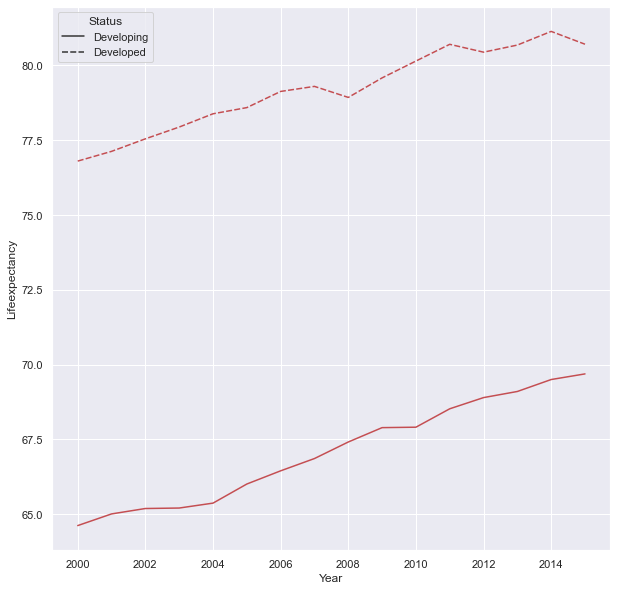

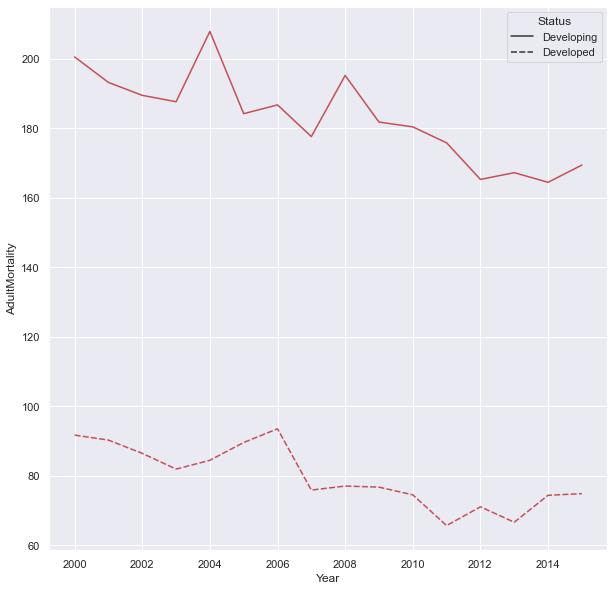

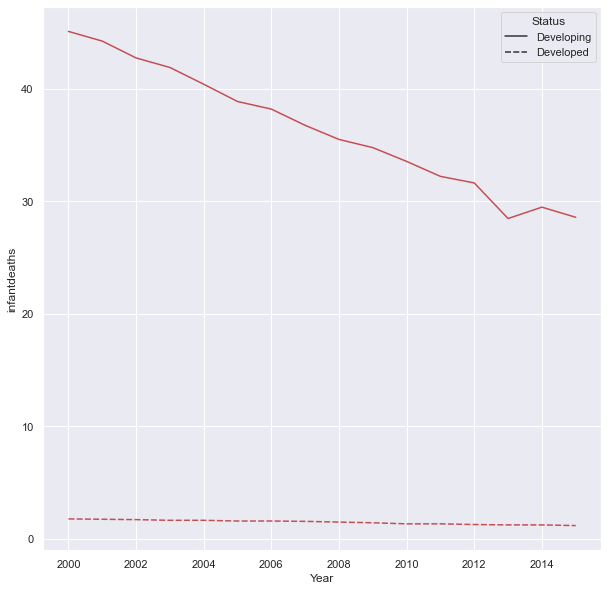

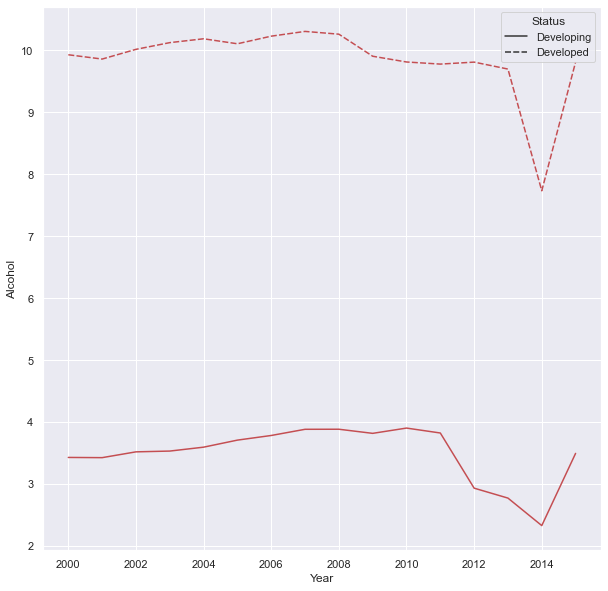

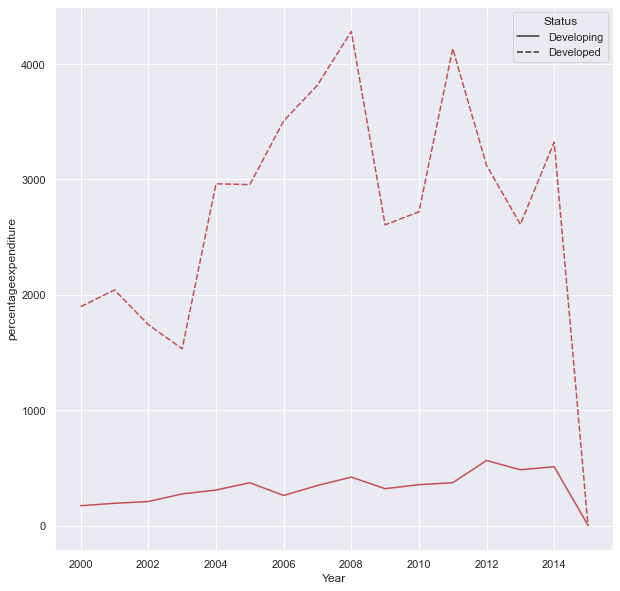

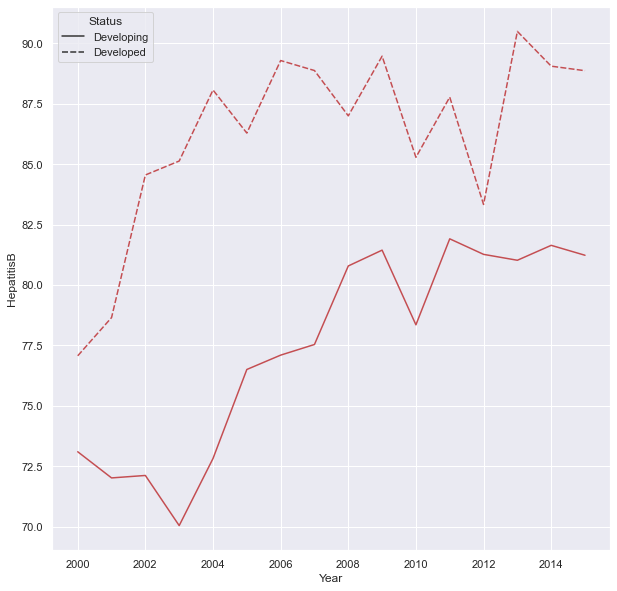

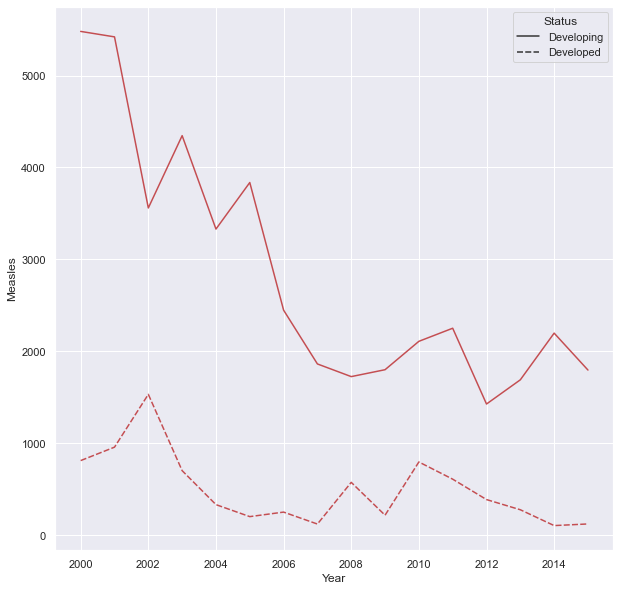

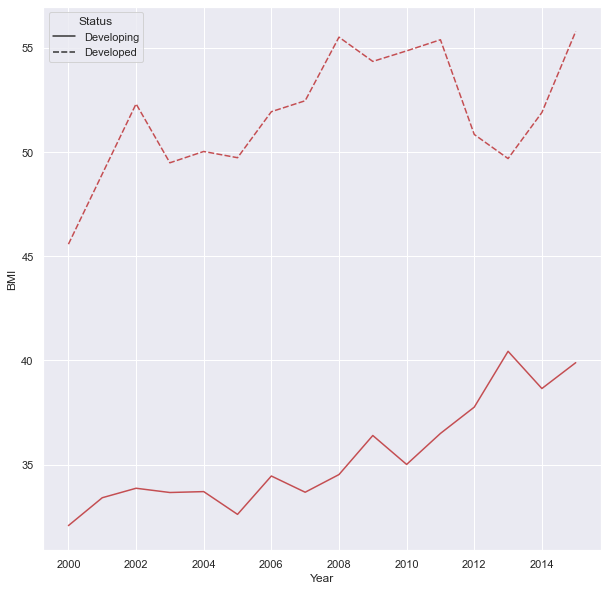

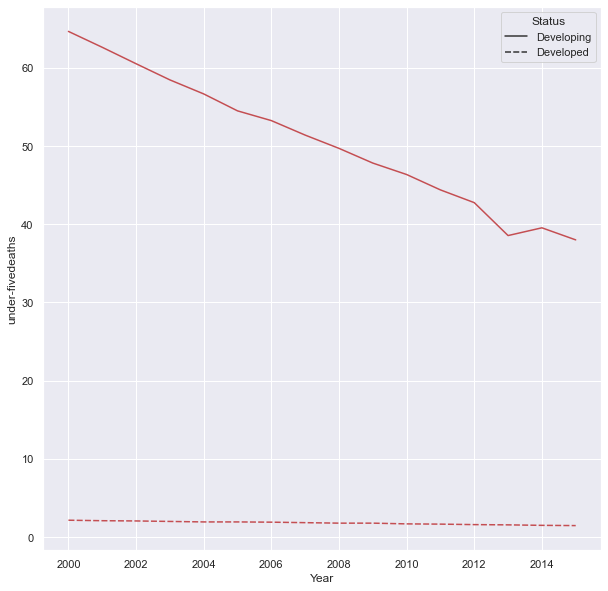

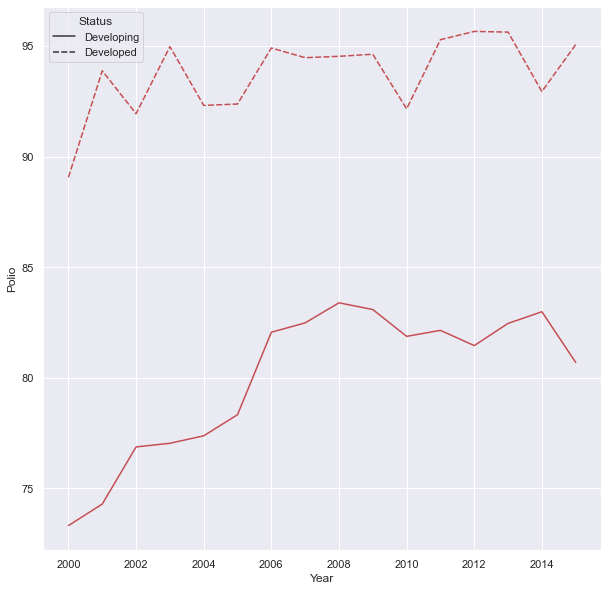

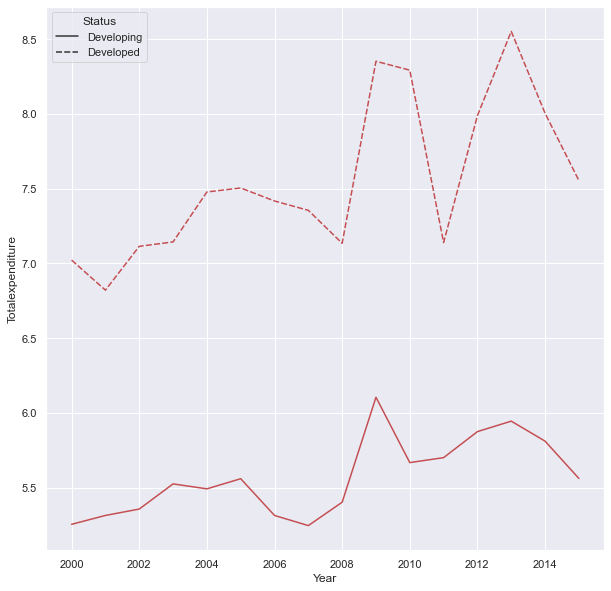

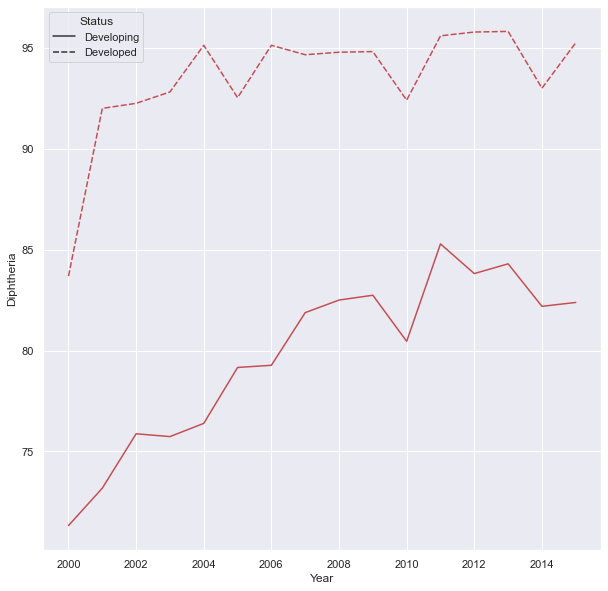

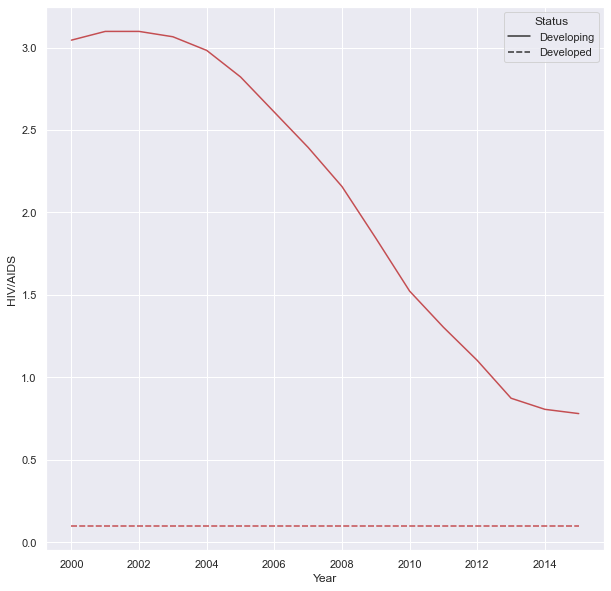

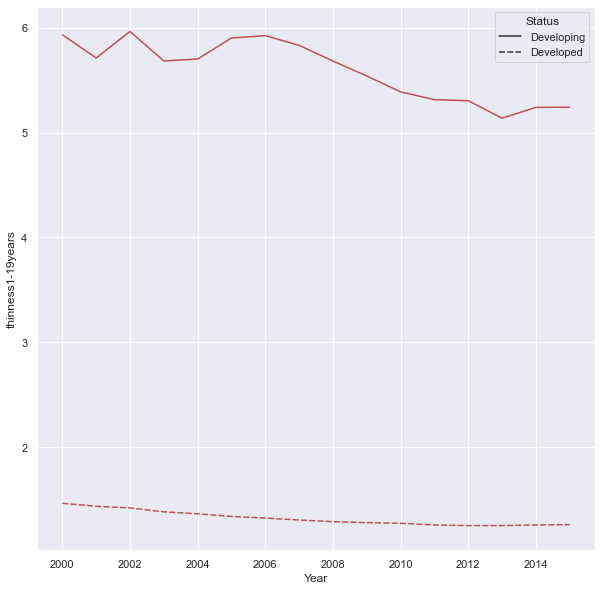

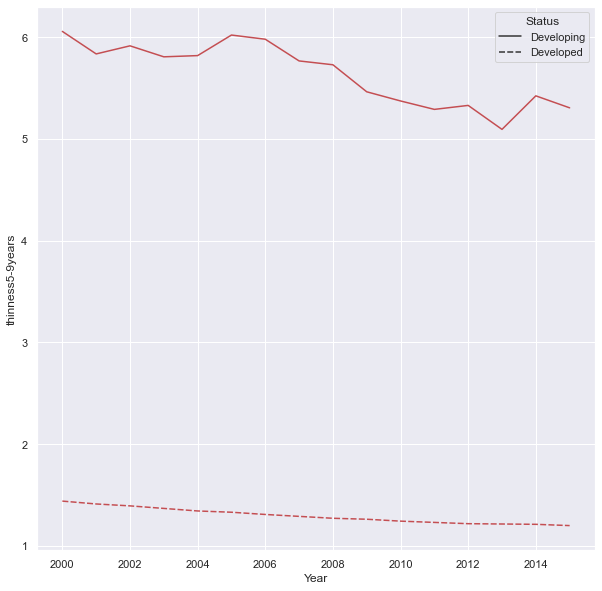

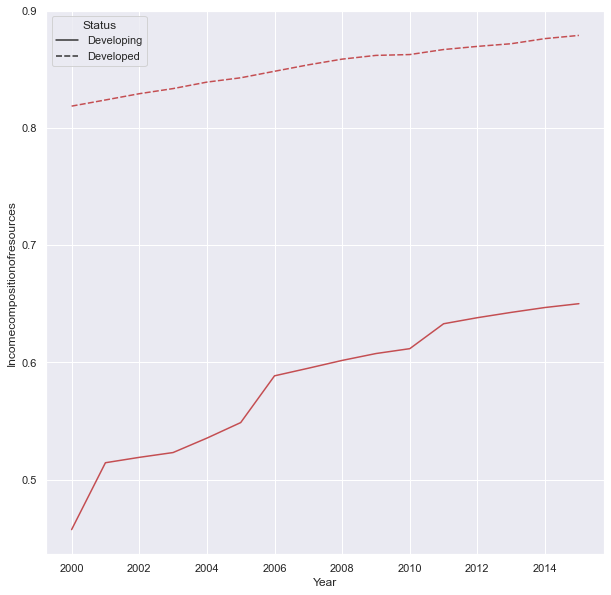

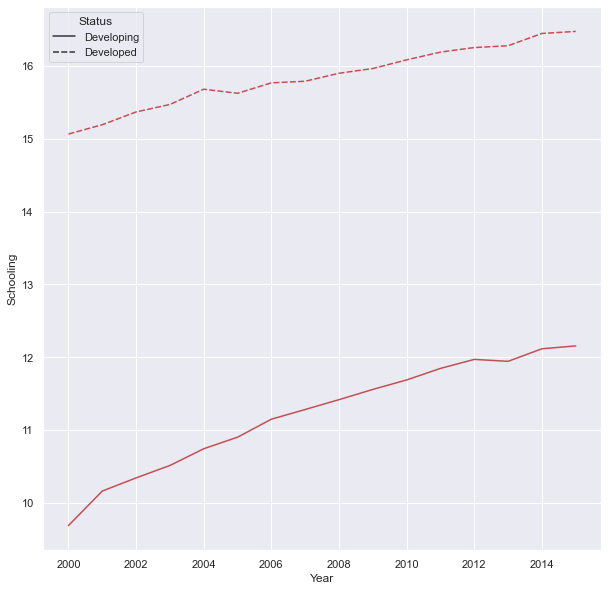

In [42]:
for i in f:
    fig = plt.figure(figsize=(10,10))
    sns.set_theme(style="darkgrid")
    sns.lineplot(x='Year',y=i,data=df,style='Status',color='r',ci=None)
    plt.xlabel('Year')
    plt.ylabel(i)

<AxesSubplot:>

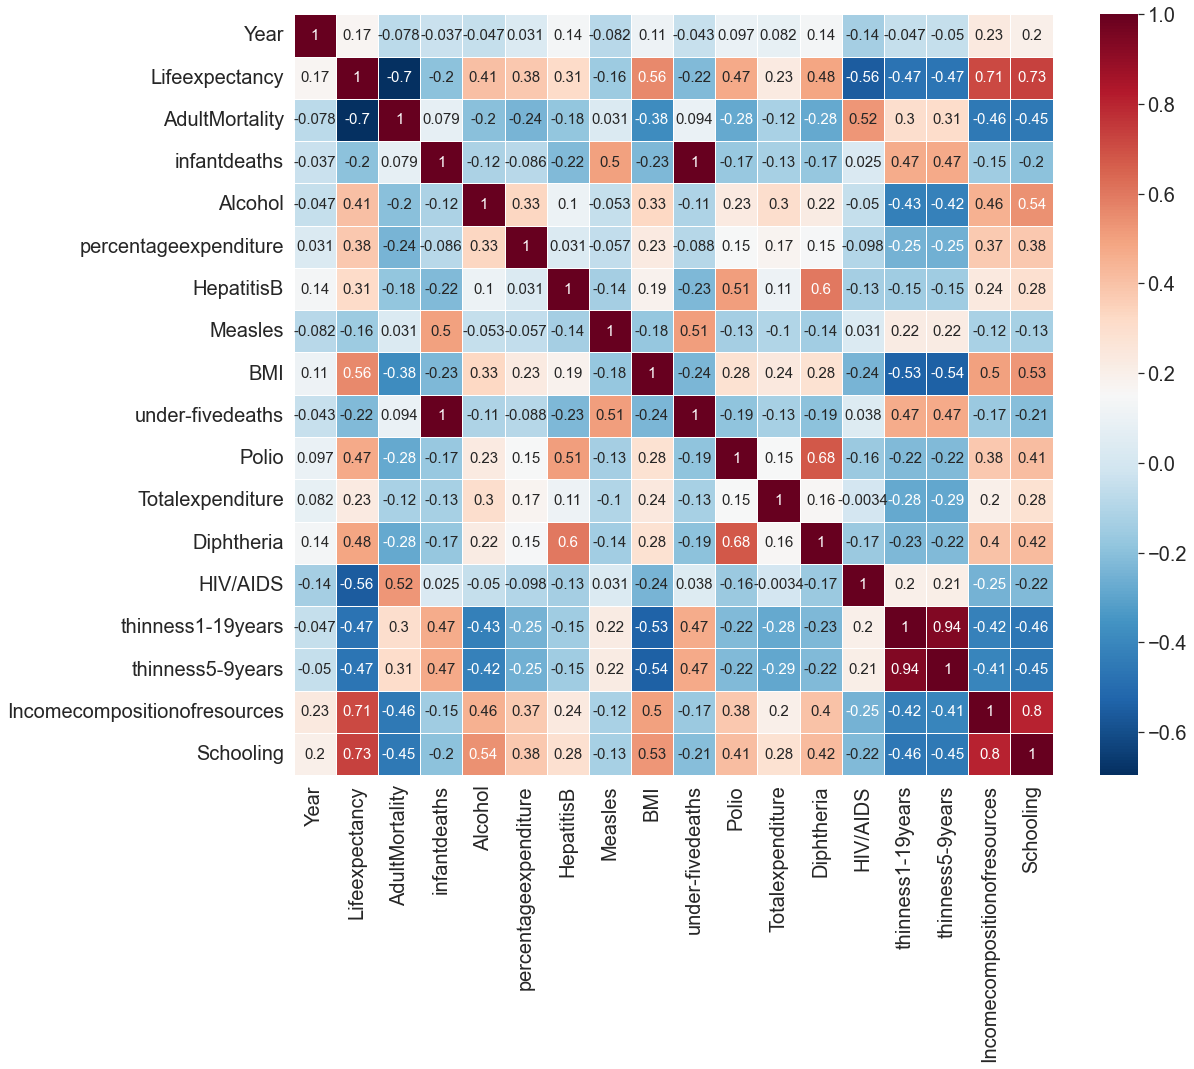

In [84]:
plt.figure(figsize=(17,14))
c=df.corr()
sns.heatmap(c,linewidth=0.5,annot=True,cmap='RdBu_r')

In [89]:
c['Lifeexpectancy'].sort_values(ascending=False)[1:]


Schooling                       0.732084
Incomecompositionofresources    0.708651
BMI                             0.560105
Diphtheria                      0.483574
Polio                           0.470396
Alcohol                         0.407103
percentageexpenditure           0.381990
HepatitisB                      0.314744
Totalexpenditure                0.226319
Year                            0.168709
Measles                        -0.157401
infantdeaths                   -0.196324
under-fivedeaths               -0.222286
thinness5-9years               -0.468218
thinness1-19years              -0.473757
HIV/AIDS                       -0.556165
AdultMortality                 -0.696386
Name: Lifeexpectancy, dtype: float64

### The top 10 correlated features

In [122]:
sol = c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)
print('Top 10 Positively Correlated Features Pairs:')
print(sol[:10],'\n')
print('Bottom 10 Negatively Correlated Features Pairs:','\n')
print(sol[-10:].sort_values())


Top 10 Positively Correlated Features Pairs:
infantdeaths                  under-fivedeaths                0.996629
thinness1-19years             thinness5-9years                0.939122
Incomecompositionofresources  Schooling                       0.801269
Lifeexpectancy                Schooling                       0.732084
                              Incomecompositionofresources    0.708651
Polio                         Diphtheria                      0.676641
HepatitisB                    Diphtheria                      0.600456
Lifeexpectancy                BMI                             0.560105
Alcohol                       Schooling                       0.541402
BMI                           Schooling                       0.529271
dtype: float64 

Bottom 10 Negatively Correlated Features Pairs: 

Lifeexpectancy     AdultMortality                 -0.696386
                   HIV/AIDS                       -0.556165
BMI                thinness5-9years               -0.53903

C:\Users\yugsi\AppData\Local\Temp/ipykernel_3096/2827203267.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)


Text(0, 0.5, 'Count')

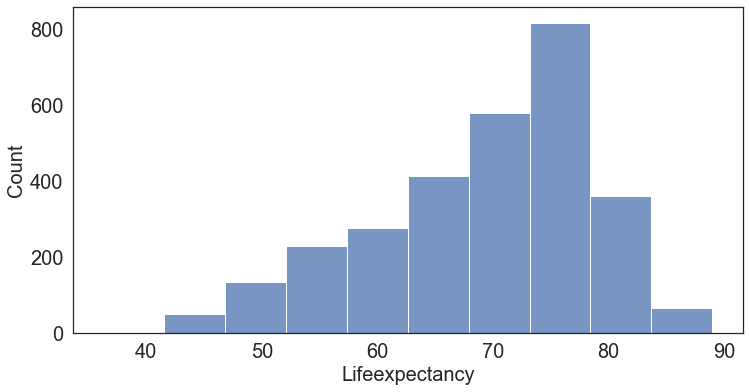

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(x=df["Lifeexpectancy"],bins=10)
plt.ylabel('Count')



Clearly 70-80 is the most frequent age of Life .

In [20]:
s=df.groupby('Country').mean()
s=s.sort_values(by=['Lifeexpectancy'],ascending=False)
s=s.reset_index()

C:\Users\yugsi\anaconda3\envs\Pandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top 10 Countries with highest life expectancy'}, xlabel='Lifeexpectancy', ylabel='Country'>

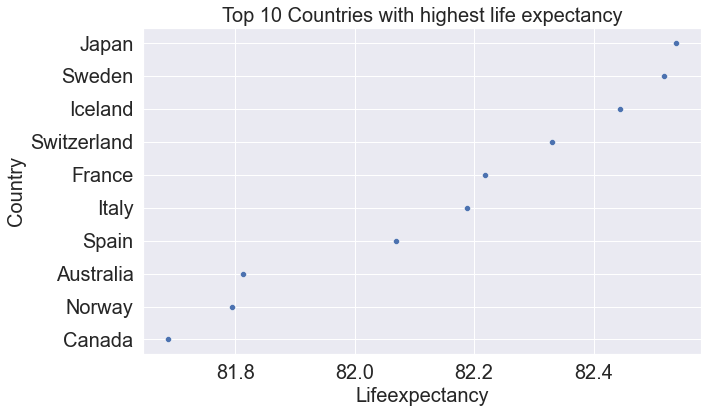

In [49]:
plt.figure(figsize=(10,6))

plt.title('Top 10 Countries with highest life expectancy',size=20)
sns.set_theme(style='darkgrid')
sns.scatterplot(s['Lifeexpectancy'],s['Country'][:10])


## Comparing each Feature with Life Expectancy

C:\Users\yugsi\AppData\Local\Temp/ipykernel_3096/144735825.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,15))


<Figure size 1080x1080 with 0 Axes>

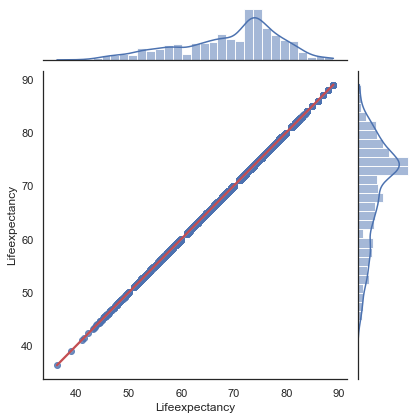

<Figure size 1080x1080 with 0 Axes>

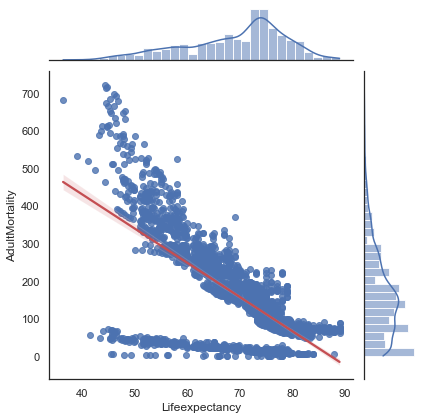

<Figure size 1080x1080 with 0 Axes>

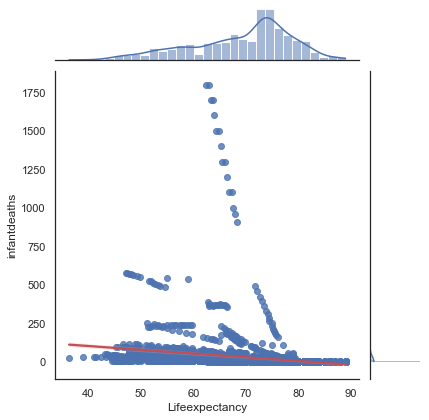

<Figure size 1080x1080 with 0 Axes>

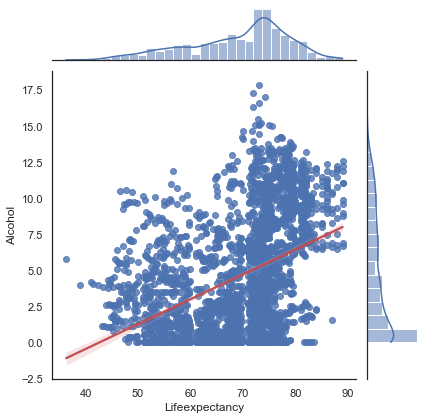

<Figure size 1080x1080 with 0 Axes>

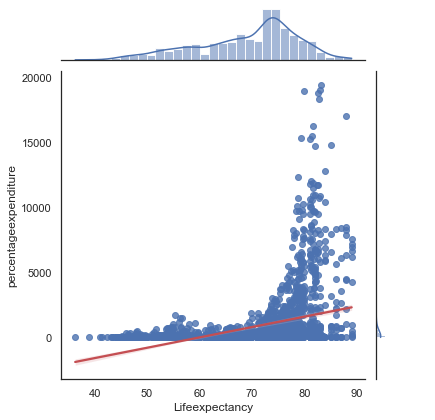

<Figure size 1080x1080 with 0 Axes>

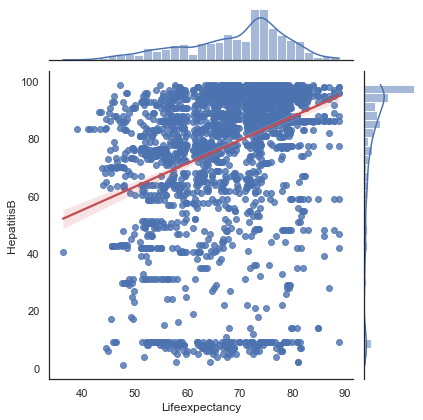

<Figure size 1080x1080 with 0 Axes>

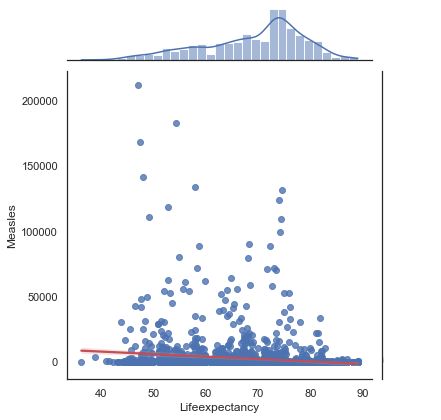

<Figure size 1080x1080 with 0 Axes>

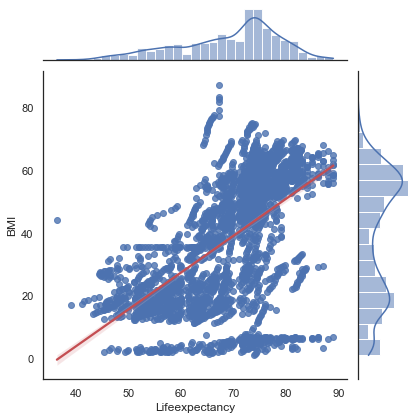

<Figure size 1080x1080 with 0 Axes>

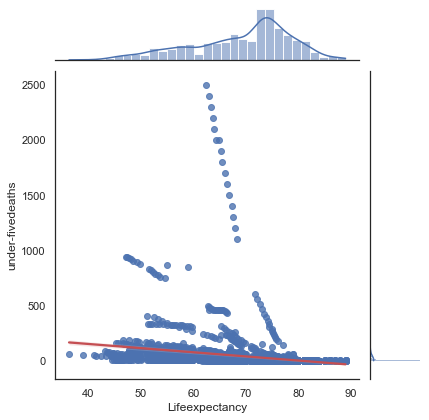

<Figure size 1080x1080 with 0 Axes>

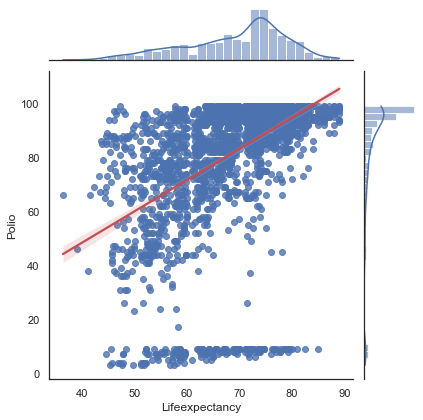

<Figure size 1080x1080 with 0 Axes>

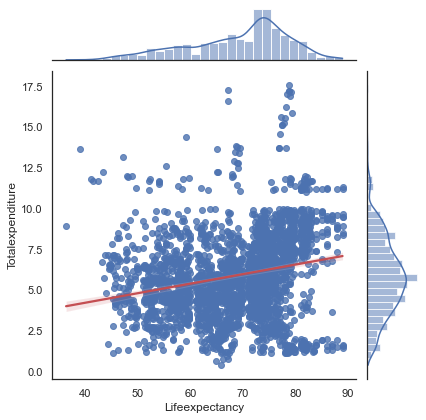

<Figure size 1080x1080 with 0 Axes>

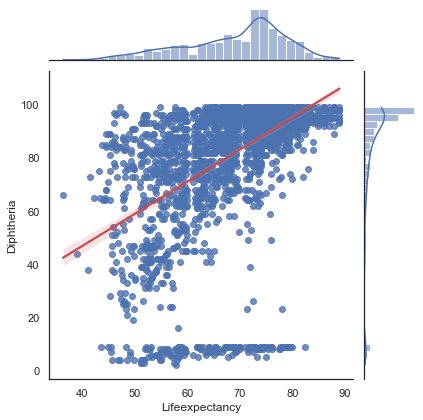

<Figure size 1080x1080 with 0 Axes>

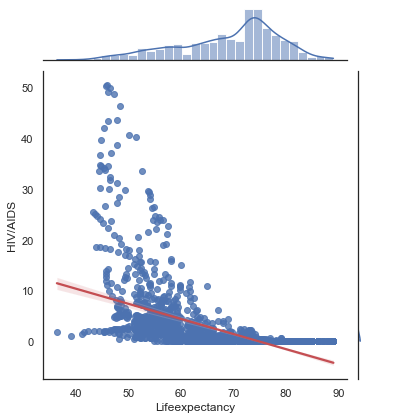

<Figure size 1080x1080 with 0 Axes>

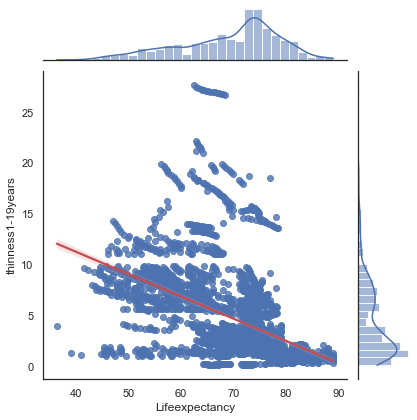

<Figure size 1080x1080 with 0 Axes>

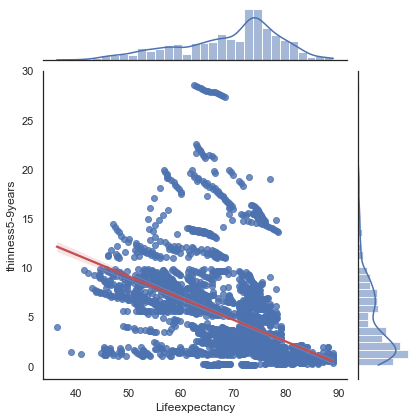

<Figure size 1080x1080 with 0 Axes>

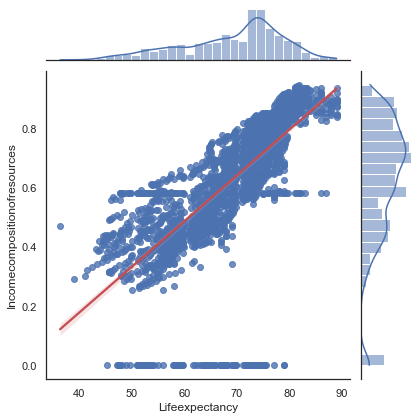

<Figure size 1080x1080 with 0 Axes>

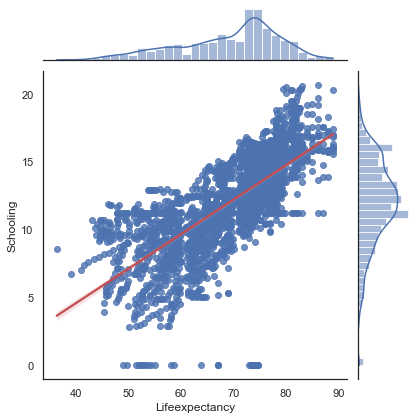

In [52]:
for i in f:
    
    fig = plt.figure(figsize=(15,15))
    
    sns.set(style="white", color_codes=True)
    
    sns.jointplot(x='Lifeexpectancy',y=i,data=df,kind = 'reg',joint_kws={'line_kws':{'color':'r'}})
    plt.xlabel('Life Expectancy')
    plt.ylabel(i)

In [23]:
df_reg=df.copy()
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_reg["Country_code"] = lb_make.fit_transform(df_reg["Country"]) 
df_reg['Status']=np.where(df_reg['Status']=='Developing',0,1)

        

In [24]:
df_reg.dtypes

Country                          object
Year                              int64
Status                            int32
Lifeexpectancy                  float64
AdultMortality                  float64
infantdeaths                      int64
Alcohol                         float64
percentageexpenditure           float64
HepatitisB                      float64
Measles                           int64
BMI                             float64
under-fivedeaths                  int64
Polio                           float64
Totalexpenditure                float64
Diphtheria                      float64
HIV/AIDS                        float64
thinness1-19years               float64
thinness5-9years                float64
Incomecompositionofresources    float64
Schooling                       float64
Country_code                      int32
dtype: object

# 
# Linear Regression
# 

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y=df_reg['Lifeexpectancy']
X=df_reg.drop(['Country','Year','Lifeexpectancy'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [125]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)


LinearRegression()

In [126]:
pred=linreg.predict(X_test)
mae_score= mean_absolute_error(y_test,pred)
mae_score ## Mean Absolute Error 

3.0974448355749518

In [127]:
rmse_score=mean_squared_error(y_test,pred)
rmse_score  ## Root Mean Absolute Error 


17.38867565095432

In [28]:
linreg.score(X_test,y_test) ## R2 score

0.8155028545606956

C:\Users\yugsi\anaconda3\envs\Pandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Value')

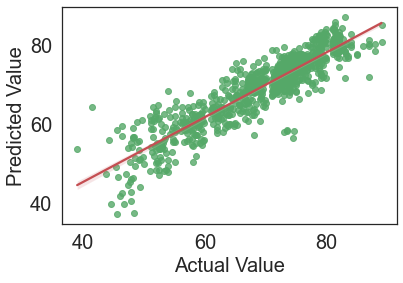

In [149]:
sns.regplot(y_test,pred,color='g',line_kws={'color':'r'})
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [196]:
df2=y_test.to_frame(name='Actual')
df2['Prediction']=pred
df2=df2.sort_values(by='Actual')
df2=df2.reset_index()
df2.drop('index',axis=1)

,Actual,Prediction
0,39.0,53.658568
1,41.5,64.250470
2,43.8,47.313463
3,44.3,55.967889
4,44.6,39.828597
...,...,...
877,87.0,80.104868
878,88.0,78.436421
879,88.0,80.162179
880,89.0,84.951770


<Figure size 1080x1080 with 0 Axes>

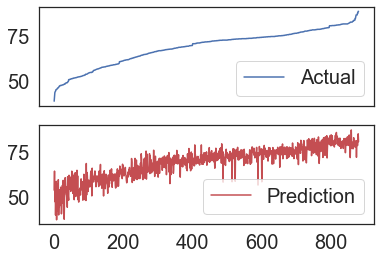

In [236]:
plt.figure(figsize=(15,15))
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1,sharex=True)
ax1.plot(df2['Actual'],label='Actual')
ax1.legend()
ax2.plot(df2['Prediction'],color='r',label='Prediction')
ax2.legend()